In [207]:
# !/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on 20180510

@author: zhangji
"""

%pylab inline
pylab.rcParams['figure.figsize'] = (18.5, 10.5)

import numpy as np
import pandas as pd
from codeStore import post_support_fun as psf
import os
import glob
from matplotlib import pyplot as plt
from IPython.display import display, HTML
from scanf import scanf

PWD = os.getcwd()
fontsize = 40
np.set_printoptions(linewidth=110, precision=5)

Populating the interactive namespace from numpy and matplotlib


In [46]:
# check convergence1, infspace

dir_name = 'infhlx_20180510'
t_dir = os.path.join(PWD, dir_name)
txt_names = glob.glob('./%s/*.txt' % dir_name)

maxtheta = []
ntheta_fct = []
nnode = []
resistance = []

for txt_name in txt_names:
    with open(txt_name, 'r') as ftxt:
        FILE_DATA = ftxt.read()
    
    text_headle = 'cut of max theta '
    temp1 = psf.read_array(text_headle, FILE_DATA, array_length=1)
    maxtheta.append(temp1)
    
    text_headle = '# of segment '
    temp2 = psf.read_array(text_headle, FILE_DATA, array_length=1)
    ntheta_fct.append(temp2 / temp1)
    
    text_headle = '# of node '
    temp1 = psf.read_array(text_headle, FILE_DATA, array_length=1)
    nnode.append(temp1)
    
    text_headle = '\[ '
    temp1 = psf.read_array(text_headle, FILE_DATA, array_length=6)
    resistance.append(temp1)
    
resistance = np.vstack(resistance).T
data_infhlx = pd.DataFrame({'maxtheta': np.hstack(maxtheta), 
                    'ntheta_fct': np.hstack(ntheta_fct), 
                    'nnode': np.hstack(nnode), 
                    'Fx': resistance[0], 
                    'Fy': resistance[1], 
                    'Fz': resistance[2], 
                    'Tx': resistance[3], 
                    'Ty': resistance[4], 
                    'Tz': resistance[5]})\
        .pivot_table(index=['nnode', 'ntheta_fct'], columns=['maxtheta'])



In [74]:
display(data_infhlx.Fz)

maxtheta             10.0      50.0      100.0     500.0     1000.0   \
nnode   ntheta_fct                                                     
100.0   1.0        -2.020018 -0.735330 -0.461556 -0.152041  0.931784   
        10.0       -0.043391 -0.009541 -0.007856 -0.005714 -0.005150   
        100.0      -0.248554 -0.086174 -0.063288 -0.035537 -0.028935   
500.0   1.0         7.701690 -2.310504 -1.413104 -0.966516 -0.875648   
        10.0        0.066558  0.041152  0.030818  0.017156  0.013731   
        100.0      -0.249133 -0.086369 -0.063429 -0.035616 -0.028999   
1000.0  1.0        -3.033382 -1.801554 -1.403036 -0.972719 -0.867364   
        10.0        0.172030  0.096503  0.074246  0.043827  0.035978   
        100.0      -0.249459 -0.086486 -0.063515 -0.035666 -0.029040   
5000.0  1.0        -5.670887 -1.673278 -1.382775 -0.395750 -0.828816   
        10.0        0.731904  0.589639  0.527853  0.406641  0.365145   
        100.0      -0.251386 -0.087217 -0.064059 -0.035983 -0.029304   
10000.0 1.0        -3.733249 -1.831145 -1.339350 -0.370184 -0.845515   
        10.0        1.312145  2.580386  6.218185 -1.941961 -1.141201   
        100.0      -0.252632 -0.087668 -0.064390 -0.036173       NaN   
20000.0 1.0        -4.529970 -1.205960 -1.407888  0.183787 -0.853211   
        10.0        2.549021 -2.317517 -1.083643 -0.422846       NaN   
        100.0      -0.253638 -0.088011 -0.064638       NaN       NaN   

maxtheta             5000.0    10000.0   50000.0  
nnode   ntheta_fct                                
100.0   1.0        -4.996329  0.060272  0.069100  
        10.0       -0.004215 -0.003912 -0.003356  
        100.0      -0.019212 -0.016471 -0.011979  
500.0   1.0        -0.707690  6.653986  2.735439  
        10.0        0.008614  0.007170  0.004821  
        100.0      -0.019254 -0.016508 -0.012005  
1000.0  1.0        -0.702676 -0.646903 -0.563002  
        10.0        0.023991  0.020529 -0.054575  
        100.0      -0.019282 -0.016532 -0.012263  
5000.0  1.0        -0.718505 -0.654346 -0.561600  
        10.0        0.289784  0.264504 -0.052458  
        100.0      -0.019465       NaN       NaN  
10000.0 1.0        -0.702890 -0.658022 -0.561350  
        10.0       -0.527928 -0.414476       NaN  
        100.0            NaN       NaN       NaN  
20000.0 1.0        -0.419583 -0.658674       NaN  
        10.0       -0.192668       NaN       NaN  
        100.0            NaN       NaN       NaN

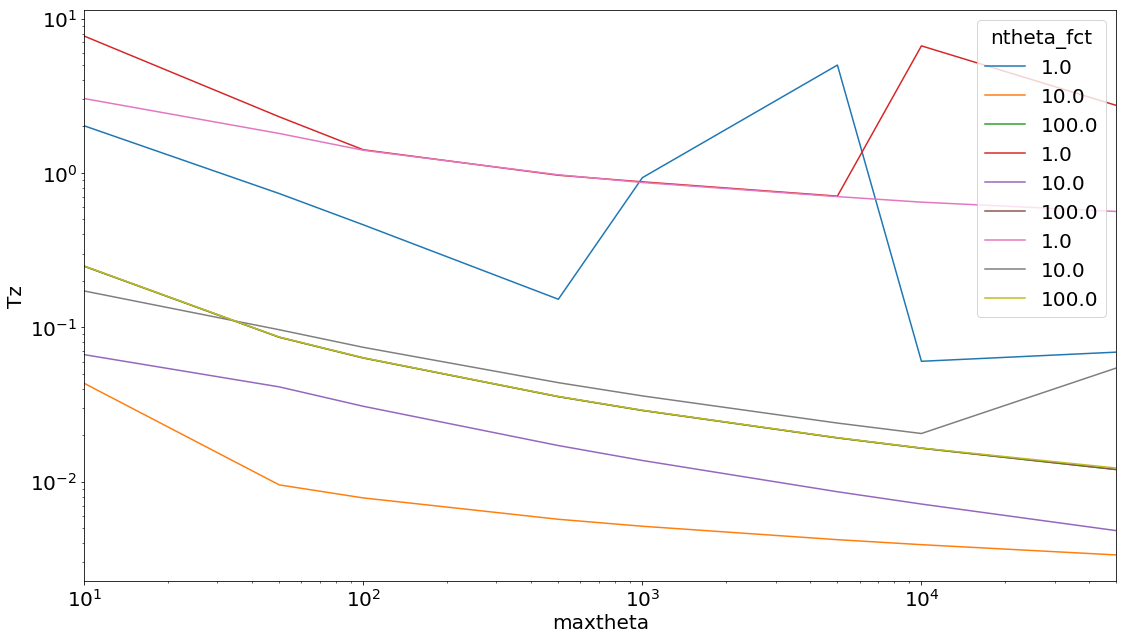

In [76]:
tdata = np.abs(data_infhlx.Fz)
tylabe = 'Tz'

fig, ax1 = plt.subplots(nrows=1, ncols=1)
fig.patch.set_facecolor('white')
for i0 in tdata.index.levels[0][[0, 1, 2]]:
    tdata.loc[i0].T.plot(logx=True, logy=True, fontsize=fontsize*0.5, ax=ax1)
ax1.set_xlabel(ax1.get_xlabel(), fontsize=fontsize*0.5)
ax1.set_ylabel(tylabe, fontsize=fontsize*0.5)
ax1.legend(fontsize=fontsize*0.5)
ax1.get_legend().set_title(tdata.index.names[1], prop = {'size':fontsize*0.5})



In [78]:
# check convergence2, in pipe

dir_name = 'helixInPipe_20180512'
t_dir = os.path.join(PWD, dir_name)
txt_names = glob.glob('./%s/*.txt' % dir_name)

maxtheta = []
ntheta_fct = []
nnode = []
resistance = []

for txt_name in txt_names:
    with open(txt_name, 'r') as ftxt:
        FILE_DATA = ftxt.read()
    
    text_headle = 'cut of max theta '
    temp1 = psf.read_array(text_headle, FILE_DATA, array_length=1)
    maxtheta.append(temp1)
    
    text_headle = '# of segment '
    temp2 = psf.read_array(text_headle, FILE_DATA, array_length=1)
    ntheta_fct.append(temp2 / temp1)
    
    text_headle = '# of node '
    temp1 = psf.read_array(text_headle, FILE_DATA, array_length=1)
    nnode.append(temp1)
    
    text_headle = '\[ '
    temp1 = psf.read_array(text_headle, FILE_DATA, array_length=6)
    resistance.append(temp1)
    
resistance = np.vstack(resistance).T
data_helixInPipe = pd.DataFrame({'maxtheta': np.hstack(maxtheta), 
                    'ntheta_fct': np.hstack(ntheta_fct), 
                    'nnode': np.hstack(nnode), 
                    'Fx': resistance[0], 
                    'Fy': resistance[1], 
                    'Fz': resistance[2], 
                    'Tx': resistance[3], 
                    'Ty': resistance[4], 
                    'Tz': resistance[5]})\
        .pivot_table(index=['nnode', 'ntheta_fct'], columns=['maxtheta'])



In [81]:
data_helixInPipe.Tz

,maxtheta,10.0,100.0,1000.0,10000.0,100000.0
nnode,ntheta_fct,,,,,
100.0,30.0,13.352165,13.381459,13.377229,13.376803,13.376755


(array([-0.05,  0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,  0.35,  0.4 ]),
 <a list of 10 Text yticklabel objects>)

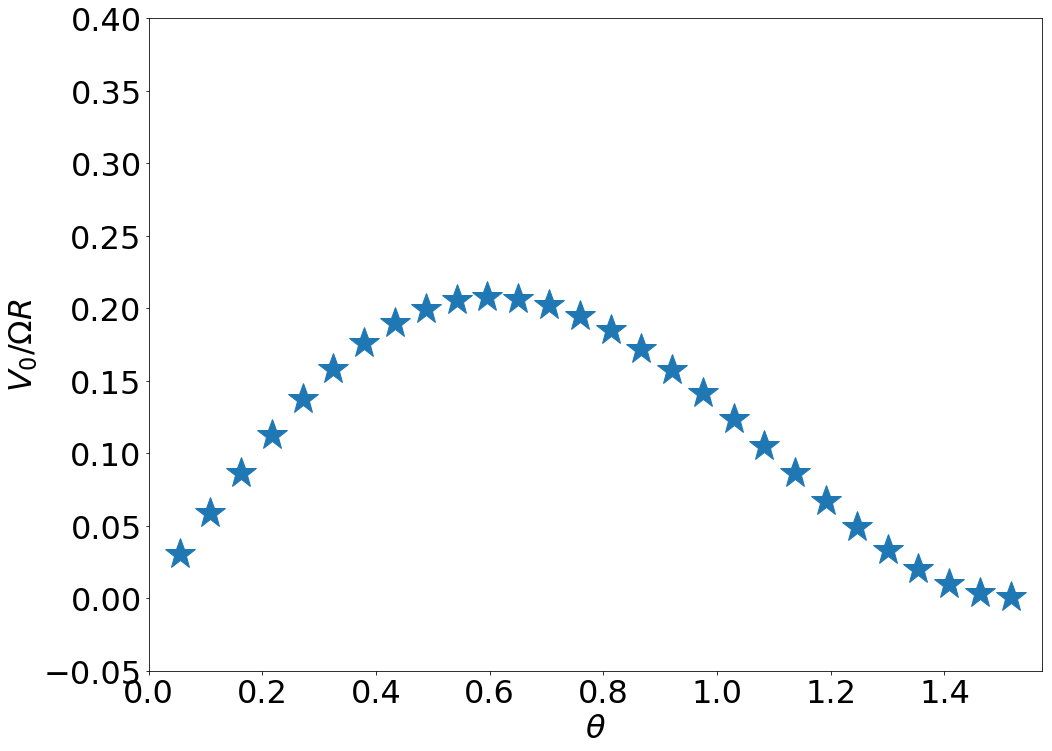

In [110]:
# compare with Liu Bin
#  helical swimming in stokes flow using a novel boundary-element method
#    Fig 5

dir_name = 'compare_Liu/Fig_5_a'
t_dir = os.path.join(PWD, dir_name)
txt_names = glob.glob('./%s/*.txt' % dir_name)

helix_theta = []
helix_velocity = []
for txt_name in txt_names:
    with open(txt_name, 'r') as ftxt:
        FILE_DATA = ftxt.read()
    
    text_headle = 'helix radius: '
    tmp1 = psf.read_array(text_headle, FILE_DATA, array_length=1)
    text_headle = 'helix pitch: '
    tmp2 = psf.read_array(text_headle, FILE_DATA, array_length=1)
    helix_theta.append(np.arctan(2 * np.pi * tmp1 / tmp2))
    
    text_headle = 'Norm forward helix velocity is '
    temp1 = psf.read_array(text_headle, FILE_DATA, array_length=1)
    helix_velocity.append(temp1)

helix_theta = np.hstack(helix_theta)
helix_velocity = np.abs(np.hstack(helix_velocity))

fig = plt.figure(figsize=(16, 12))
ax = fig.subplots(nrows=1, ncols=1)
fig.patch.set_facecolor('white')
ax.plot(helix_theta, helix_velocity, '*', ms=fontsize*0.8)
ax.set_xlabel('$\\theta$', fontsize=fontsize*0.8)
ax.set_ylabel('$V_0/\\Omega R$', fontsize=fontsize*0.8)
ax.set_xlim(0, np.pi/2)
ax.set_ylim(-0.05, 0.4)
plt.xticks(fontsize=fontsize*0.8)
plt.yticks(fontsize=fontsize*0.8)


In [201]:
# compare with Liu Bin
#  helical swimming in stokes flow using a novel boundary-element method
#    Fig 2

dir_name = 'compare_Liu/Fig_2_a'
t_dir = os.path.join(PWD, dir_name)
txt_names = glob.glob('./%s/*.txt' % dir_name)

helix_theta = []
helix_velocity = []
zoom_factor = []
for txt_name in txt_names:
    with open(txt_name, 'r') as ftxt:
        FILE_DATA = ftxt.read()
    
    text_headle = 'Norm forward helix velocity is '
    temp1 = psf.read_array(text_headle, FILE_DATA, array_length=1)
    helix_velocity.append(temp1)
    
    text_headle = 'geometry zoom factor is '
    temp1 = psf.read_array(text_headle, FILE_DATA, array_length=1)
    if np.isnan(temp1):
        taaa, temp1 = scanf('theta_%f_%f.txt', txt_name)
        helix_theta.append(taaa)
        zoom_factor.append(temp1)
    else:
        temp1 = 1
        taaa = scanf('theta_%f_inf.txt', txt_name)
        helix_theta.append(taaa)
        zoom_factor.append(temp1)
#     text_headle = 'helix radius: '
#     tmp1 = psf.read_array(text_headle, FILE_DATA, array_length=1)
#     text_headle = 'helix pitch: '
#     tmp2 = psf.read_array(text_headle, FILE_DATA, array_length=1)
#     helix_theta.append(np.arctan(2 * np.pi * tmp1 / tmp2))
    
#     text_headle = 'geometry zoom factor is '
#     temp1 = psf.read_array(text_headle, FILE_DATA, array_length=1)
#     if np.abs(temp1 - 1) < 1e-3:
#         temp1 = 0
#     zoom_factor.append(temp1)   

# helix_theta = np.hstack(helix_theta)
# helix_velocity = np.abs(np.hstack(helix_velocity))
# zoom_factor = np.hstack(zoom_factor)
data_speedup = pd.DataFrame({'helix_theta': np.hstack(helix_theta), 
                    'helix_velocity': np.hstack(helix_velocity), 
                    'zoom_factor': np.hstack(zoom_factor)})\
        .pivot_table(index=['helix_theta'], columns=['zoom_factor'])

# fig = plt.figure(figsize=(16, 12))
# ax = fig.subplots(nrows=1, ncols=1)
# fig.patch.set_facecolor('white')
# for t_theta in helix_theta:
#     tx = data_speedup.loc[t_theta]
#     ty = tx.index.levels[1]
#     ax.plot(ty, tx/tx[0])
# ax.plot(helix_theta, helix_velocity, '*', ms=fontsize*0.8)
# ax.set_xlabel('$\\theta$', fontsize=fontsize*0.8)
# ax.set_ylabel('$V_0/\\Omega R$', fontsize=fontsize*0.8)
# ax.set_xlim(0, np.pi/2)
# ax.set_ylim(-0.05, 0.4)
# plt.xticks(fontsize=fontsize*0.8)
# plt.yticks(fontsize=fontsize*0.8)


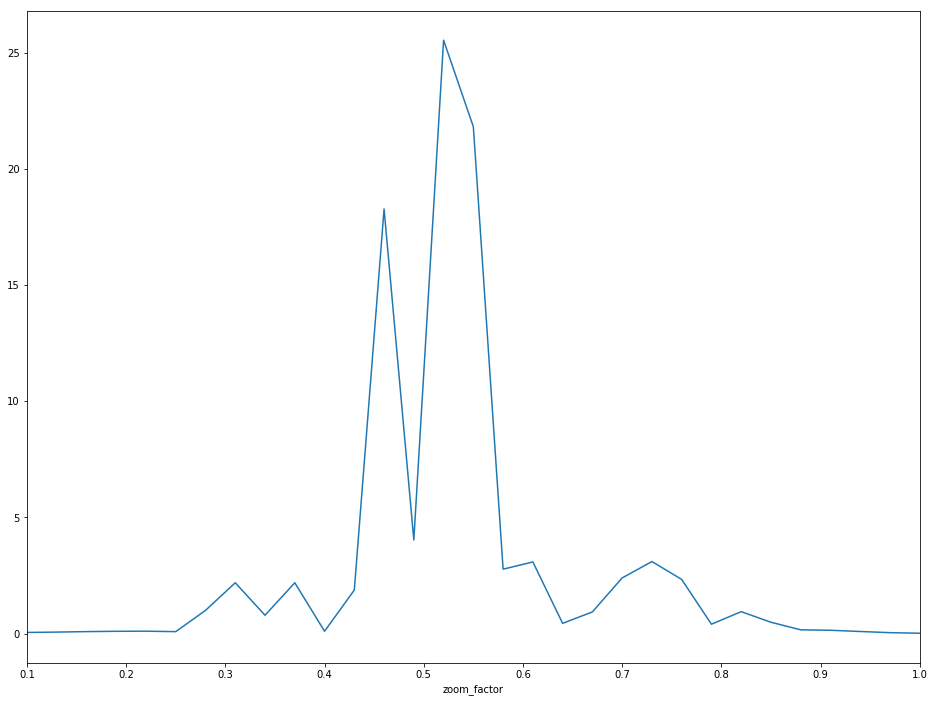

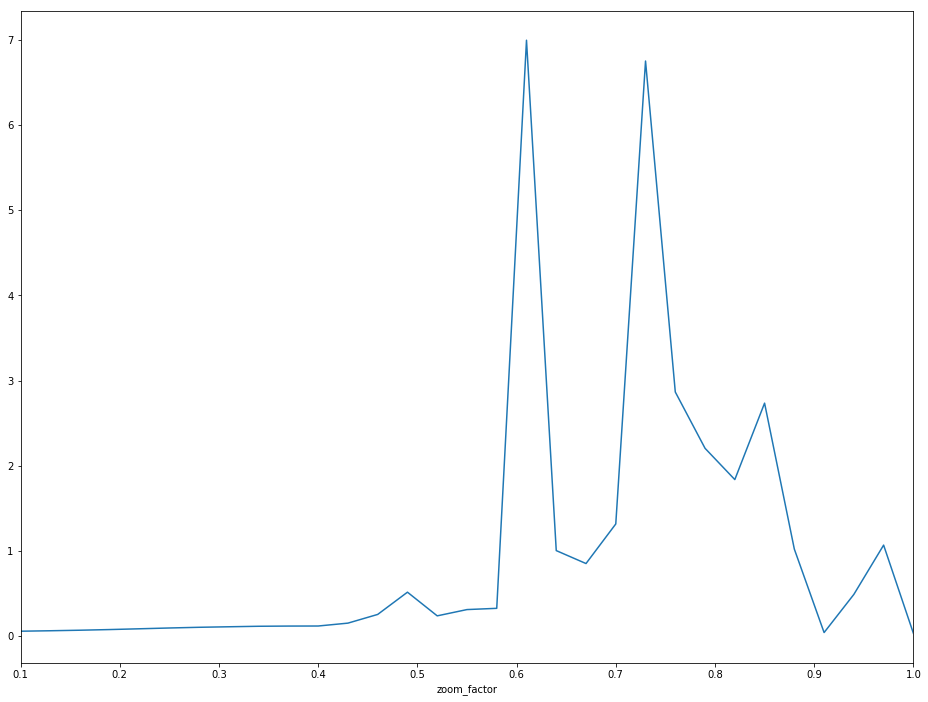

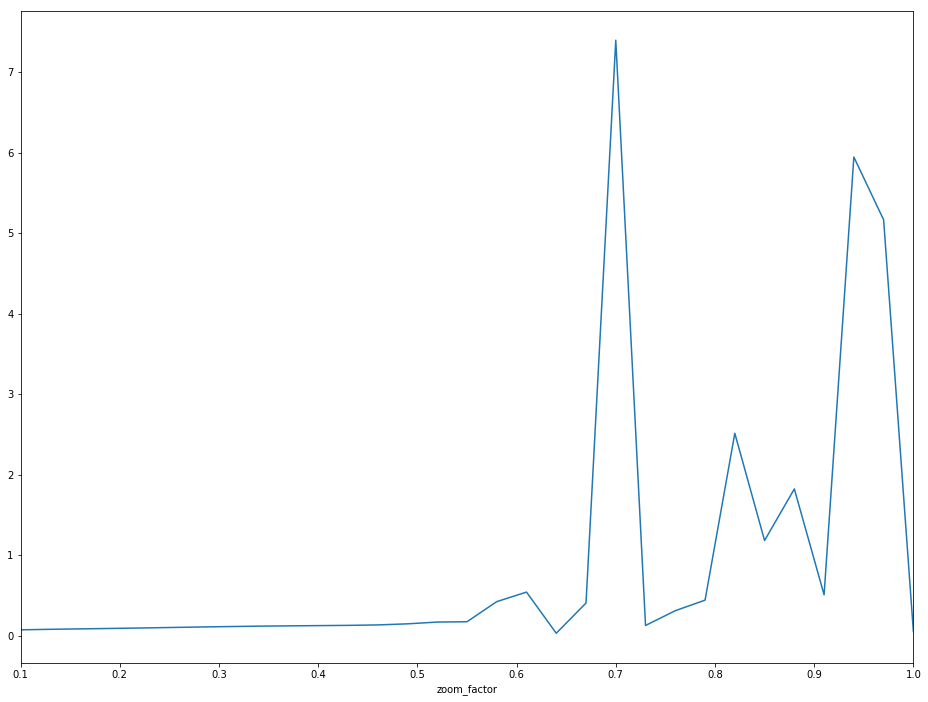

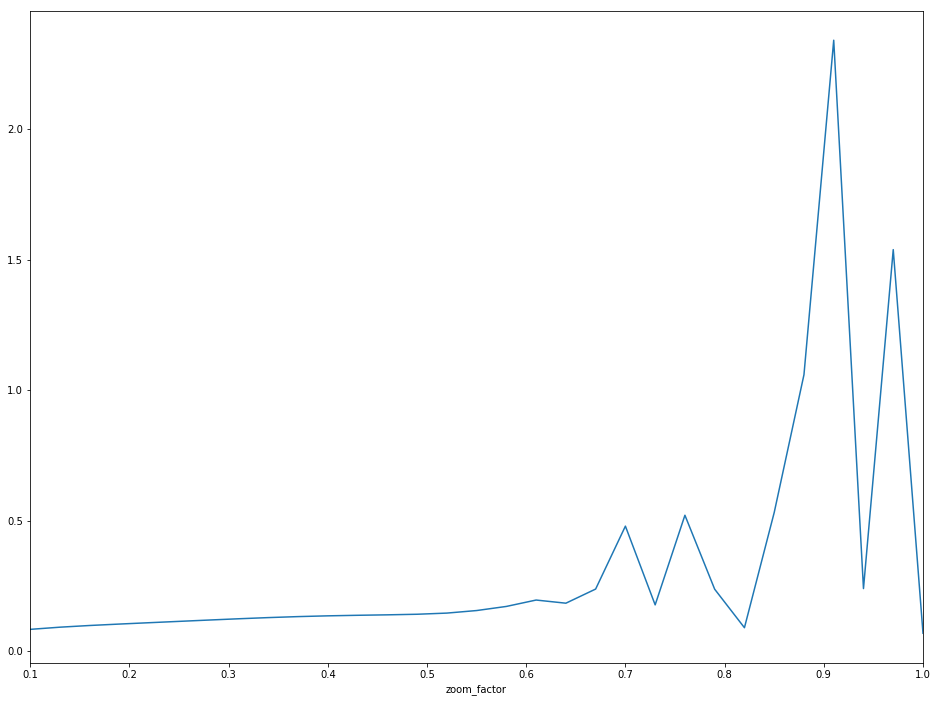

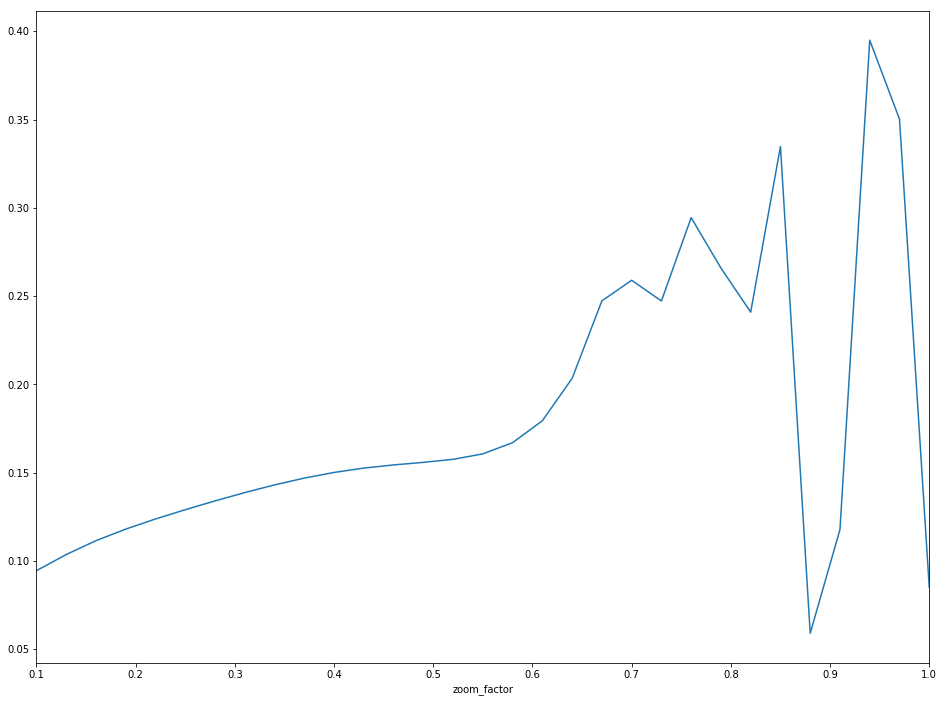

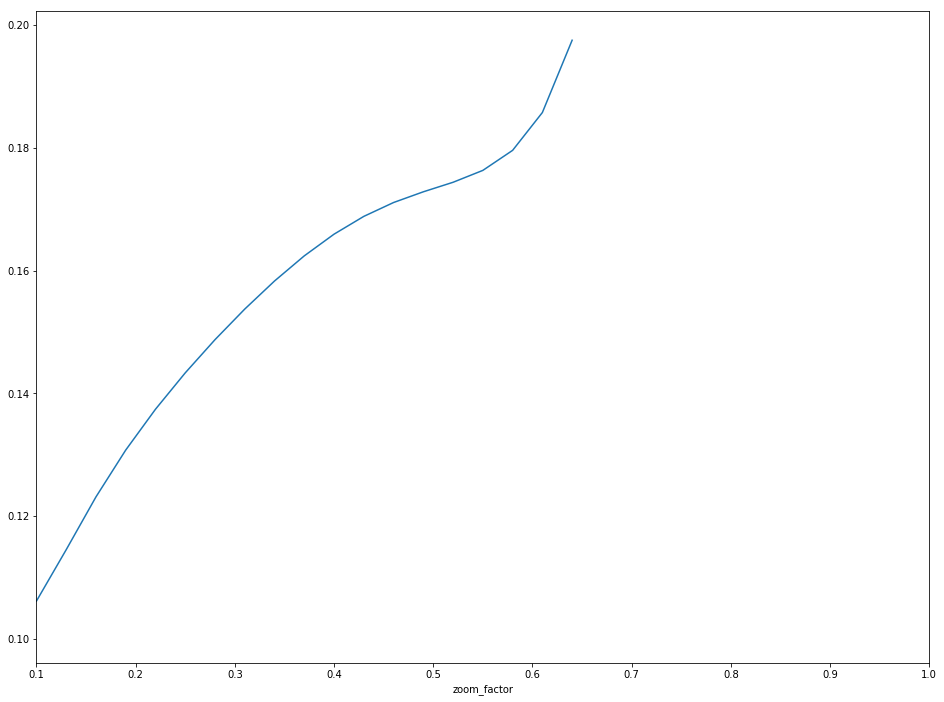

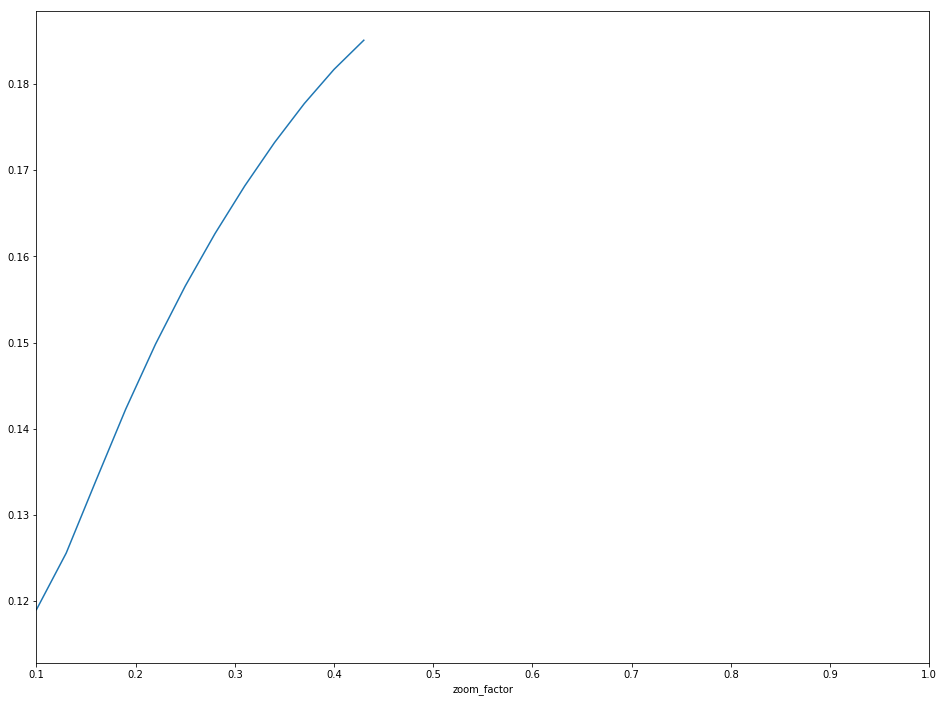

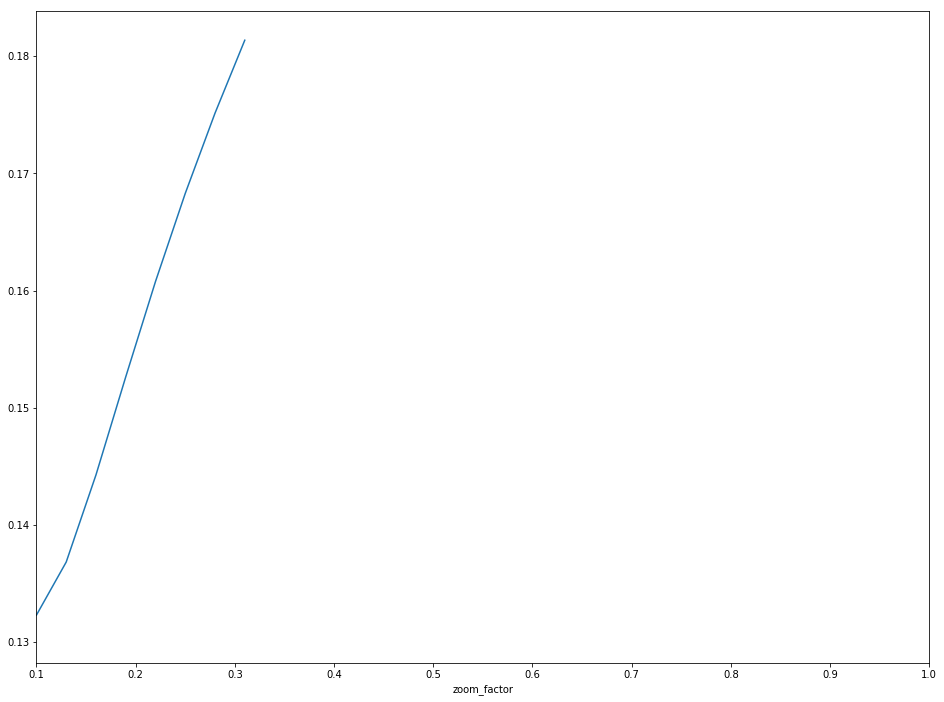

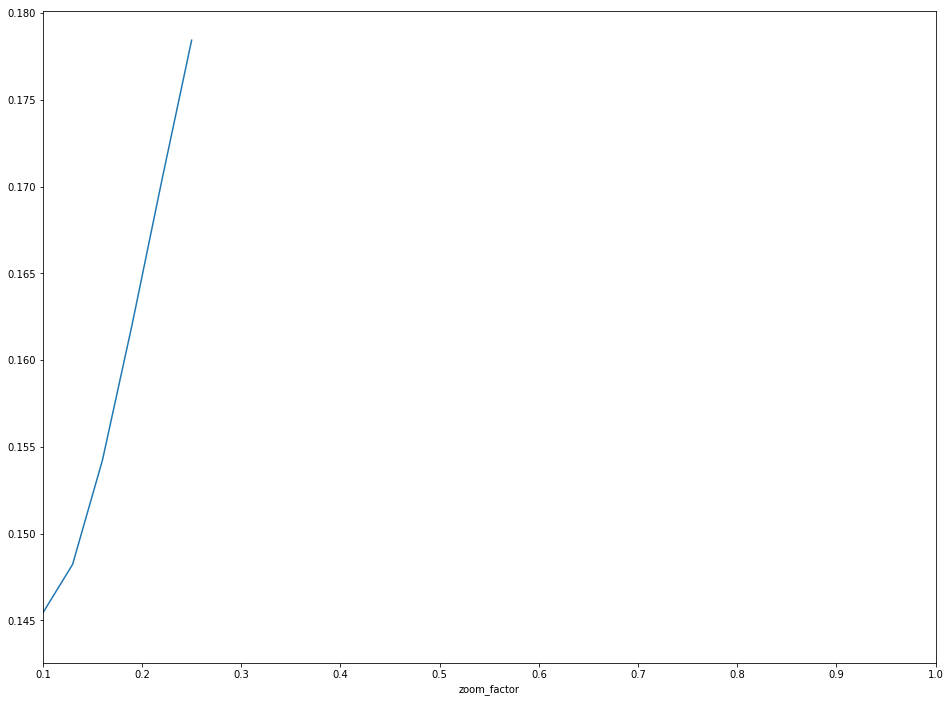

In [202]:
for i0 in range(9):
    fig = plt.figure(figsize=(16, 12))
    ax = fig.subplots(nrows=1, ncols=1)
    fig.patch.set_facecolor('white')
    np.abs(data_speedup.helix_velocity.iloc[i0]).plot(ax=ax)

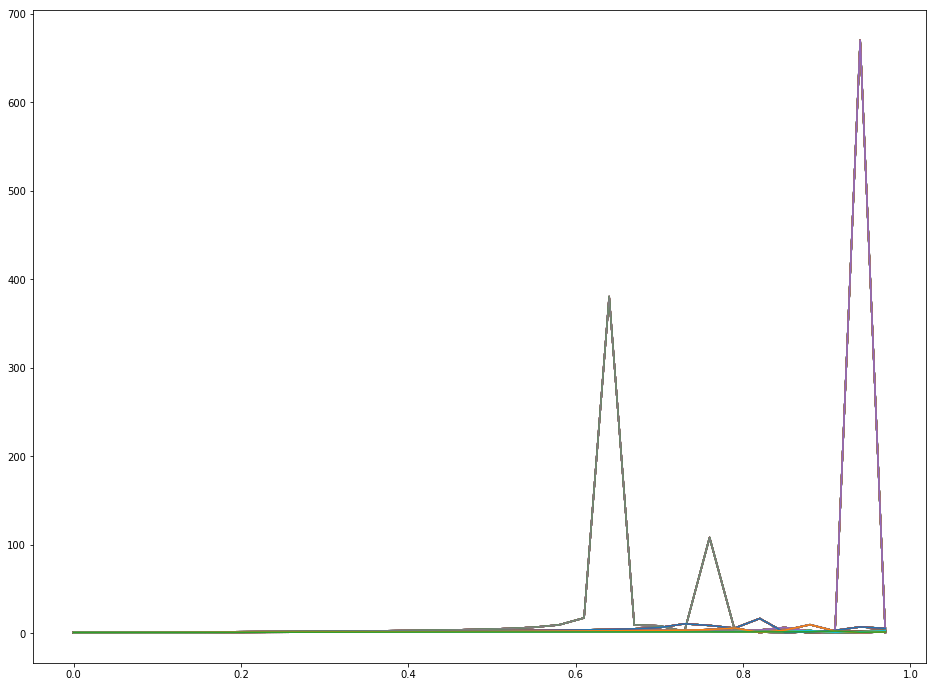

In [203]:
# compare with Liu Bin
#  helical swimming in stokes flow using a novel boundary-element method
#    Fig 2

dir_name = 'compare_Liu/bFig_2_a'
t_dir = os.path.join(PWD, dir_name)
txt_names = glob.glob('./%s/*.txt' % dir_name)

helix_theta = []
helix_velocity = []
zoom_factor = []
for txt_name in txt_names:
    with open(txt_name, 'r') as ftxt:
        FILE_DATA = ftxt.read()
    
    text_headle = 'helix radius: '
    tmp1 = psf.read_array(text_headle, FILE_DATA, array_length=1)
    text_headle = 'helix pitch: '
    tmp2 = psf.read_array(text_headle, FILE_DATA, array_length=1)
    helix_theta.append(np.arctan(2 * np.pi * tmp1 / tmp2))
    
    text_headle = 'Norm forward helix velocity is '
    temp1 = psf.read_array(text_headle, FILE_DATA, array_length=1)
    helix_velocity.append(temp1)
    
    text_headle = 'geometry zoom factor is '
    temp1 = psf.read_array(text_headle, FILE_DATA, array_length=1)
    if np.abs(temp1 - 1) < 1e-3:
        temp1 = 0
    zoom_factor.append(temp1)   

helix_theta = np.hstack(helix_theta)
helix_velocity = np.abs(np.hstack(helix_velocity))
zoom_factor = np.hstack(zoom_factor)
data_speedup = pd.DataFrame({'helix_theta': np.hstack(helix_theta), 
                    'helix_velocity': np.hstack(helix_velocity), 
                    'zoom_factor': np.hstack(zoom_factor)})\
        .pivot_table(index=['helix_theta'], columns=['zoom_factor'])

fig = plt.figure(figsize=(16, 12))
ax = fig.subplots(nrows=1, ncols=1)
fig.patch.set_facecolor('white')
for t_theta in helix_theta:
    tx = data_speedup.loc[t_theta]
    ty = tx.index.levels[1]
    ax.plot(ty, tx/tx[0])
# ax.plot(helix_theta, helix_velocity, '*', ms=fontsize*0.8)
# ax.set_xlabel('$\\theta$', fontsize=fontsize*0.8)
# ax.set_ylabel('$V_0/\\Omega R$', fontsize=fontsize*0.8)
# ax.set_xlim(0, np.pi/2)
# ax.set_ylim(-0.05, 0.4)
# plt.xticks(fontsize=fontsize*0.8)
# plt.yticks(fontsize=fontsize*0.8)


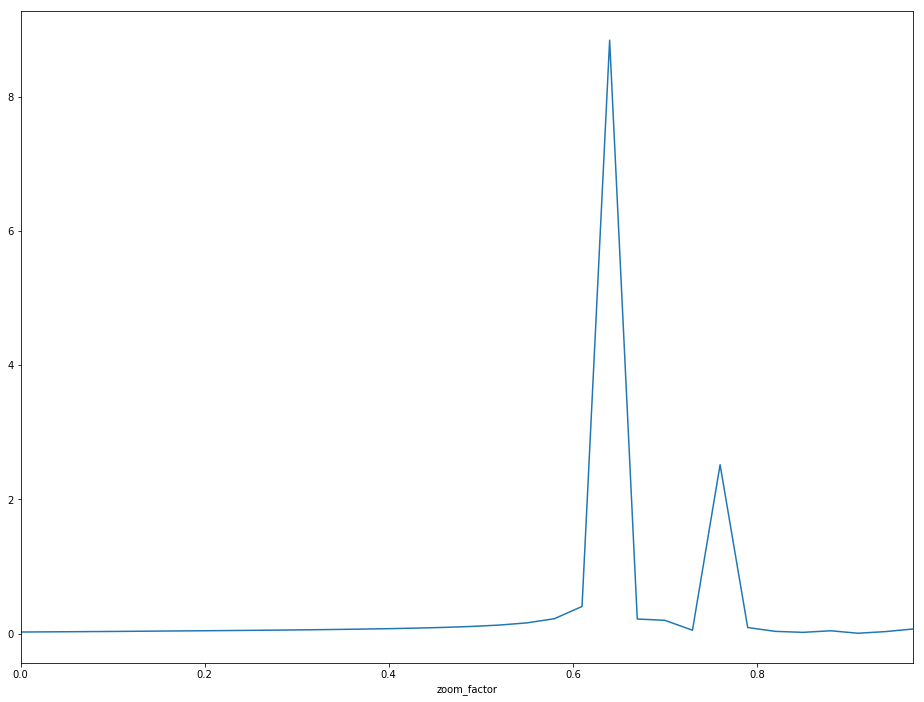

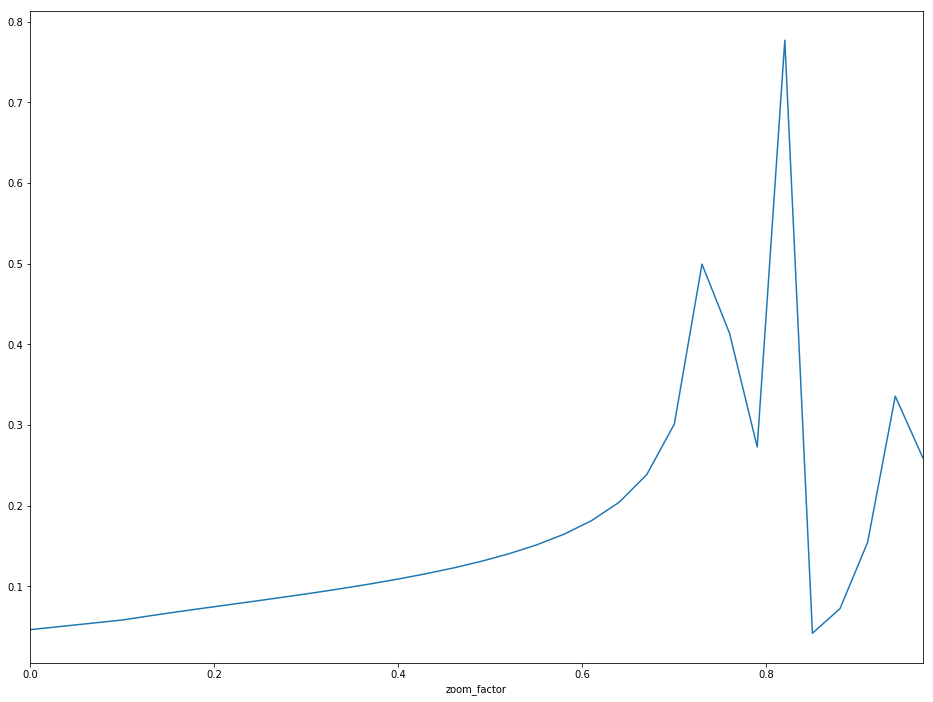

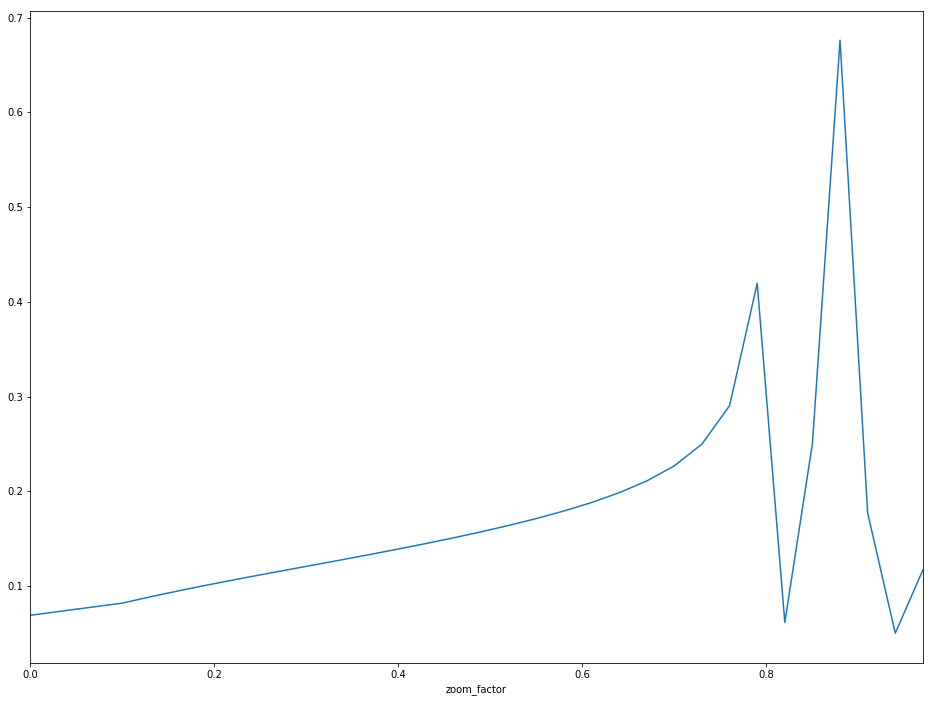

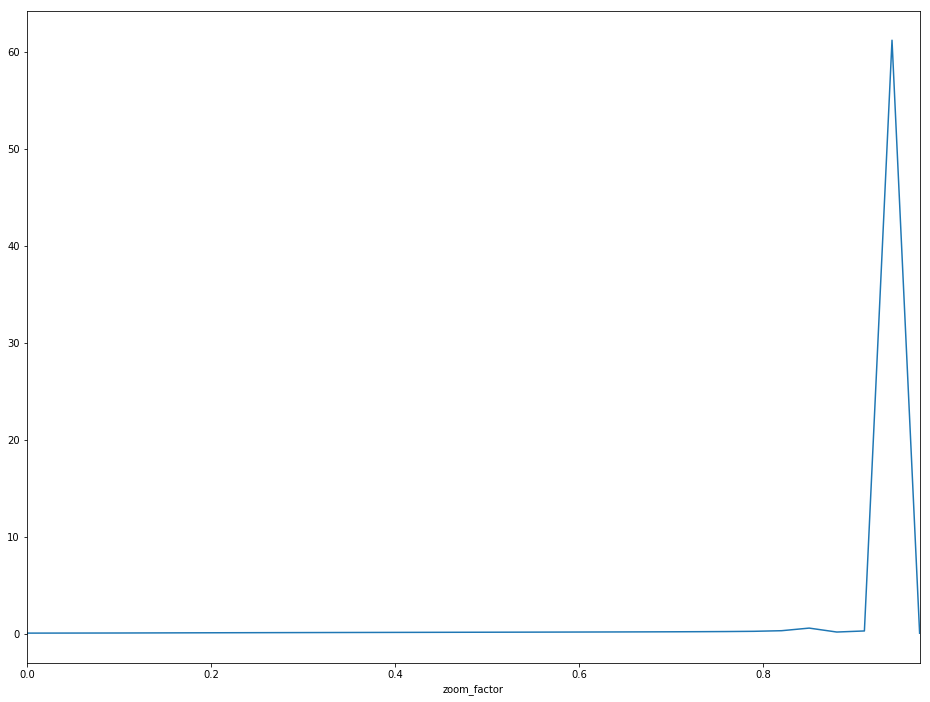

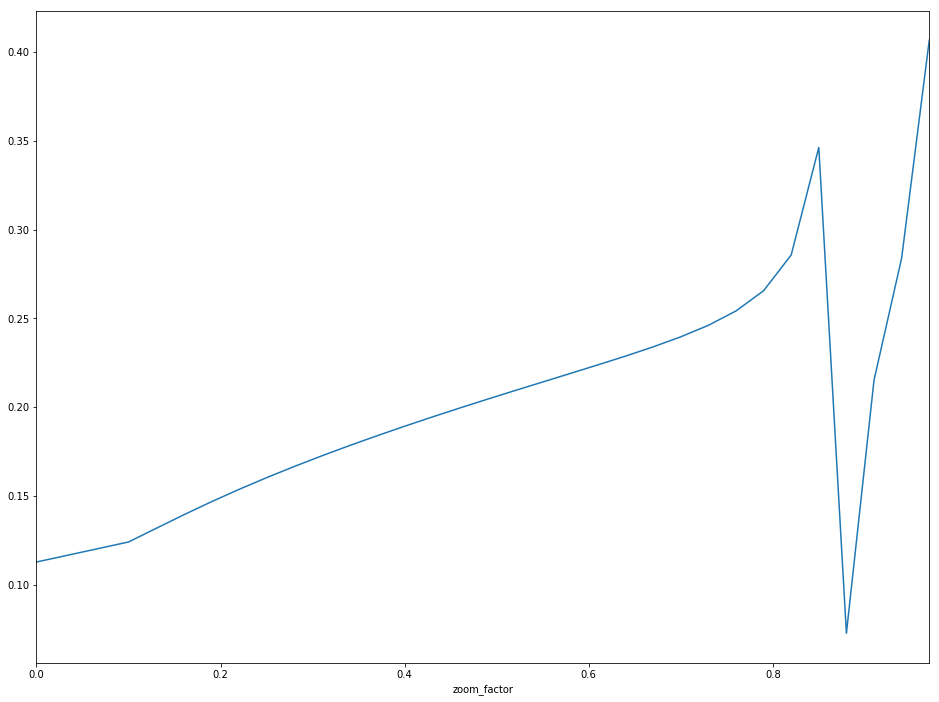

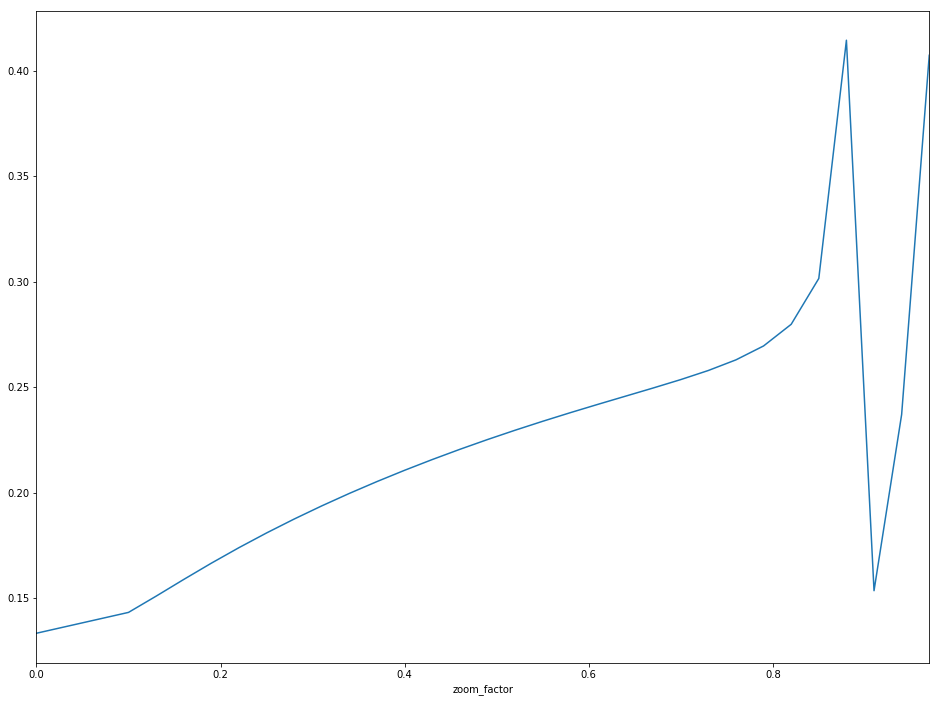

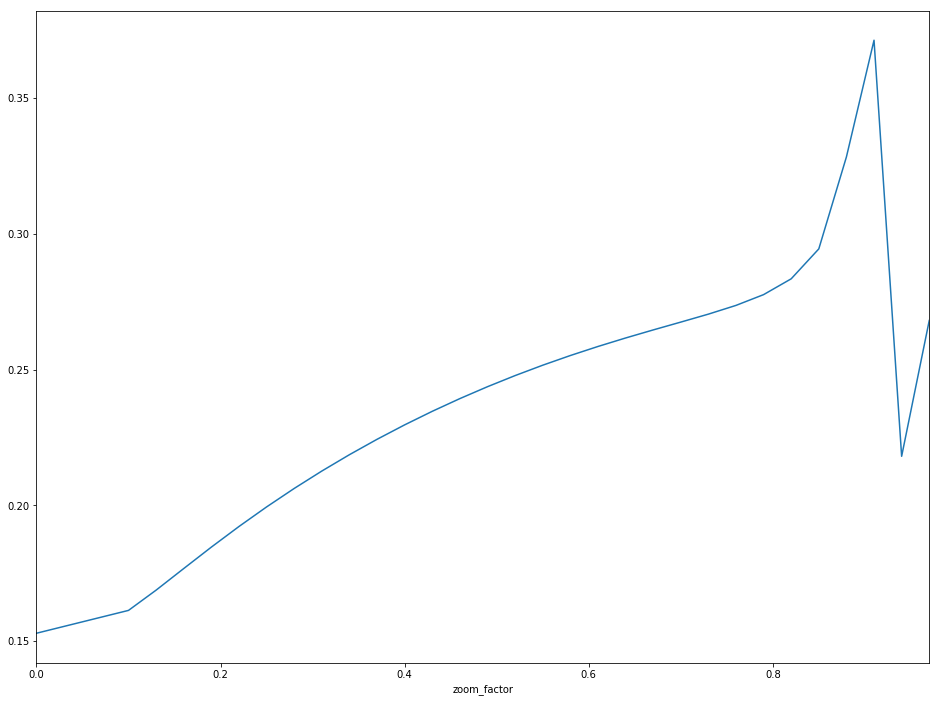

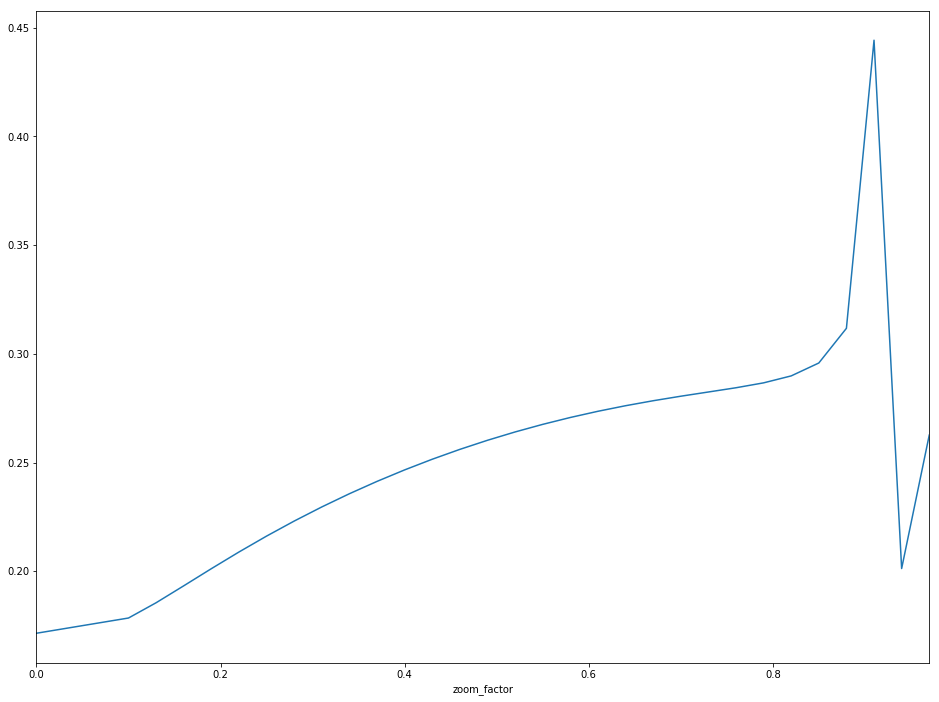

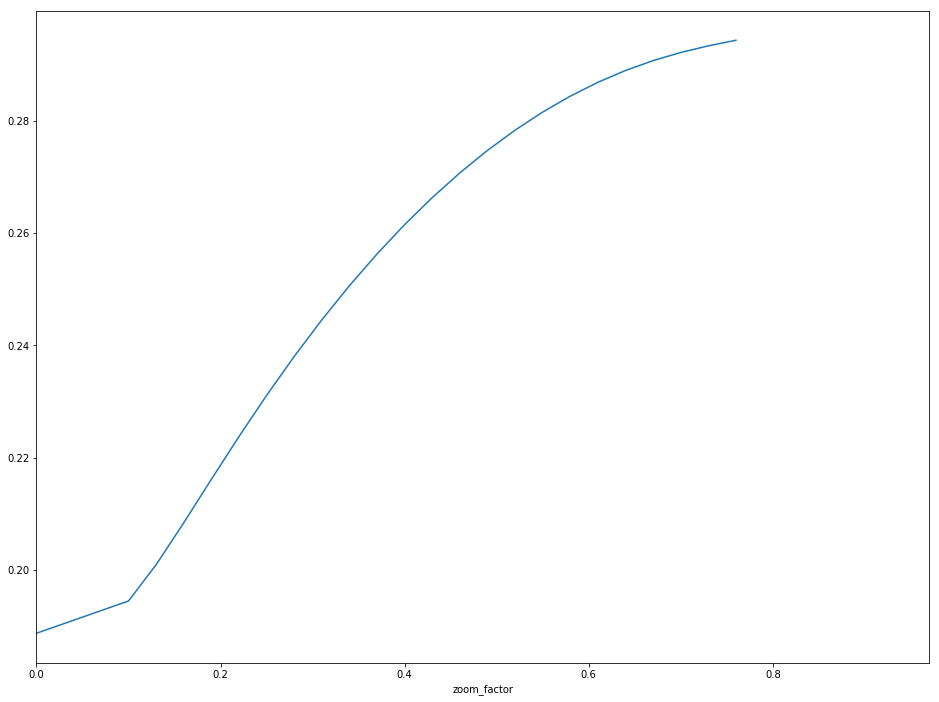

In [205]:
for i0 in range(9):
    fig = plt.figure(figsize=(16, 12))
    ax = fig.subplots(nrows=1, ncols=1)
    fig.patch.set_facecolor('white')
    np.abs(data_speedup.helix_velocity.iloc[i0]).plot(ax=ax)